# Coin Toss Example

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import copy 
import random
import pandas as pd
from tqdm import tqdm
from scipy.stats import binom
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from finite_q_learning import *
from q_learning import *

Definition of asymmetrical ambiguity sets

In [2]:
nr_coins = 10
X        = np.linspace(0, nr_coins, nr_coins+1)        # States
A        = np.array([-1, 0, 1])                        # Actions

def r(x,a,y):
    return(a * (y>x) - a * (y<x) - np.abs(a) * (x==y)) # Reward function

def P1_0(x,a):
    return binom.rvs(nr_coins, 0.5) # Assumption that is a fair coin
def p1_0(x,a,y):
    return binom.pmf(y,nr_coins,0.5)

# Adding some robustness to the model of a "fair coin"
def P2_0(x,a):
    return binom.rvs(nr_coins, 0.6)
def p2_0(x,a,y):
    return binom.pmf(y,nr_coins,0.6)

alpha      = 0.95 # Discount Factor
x_0        = 5    # Initial Value
k_0        = 0    # Initial index of the corresponding MDP, starting with the central proba of 1/2
epsilon_greedy = lambda t: np.max([0.05, 1-2*t/Nr_iter])

Computation of the useful functions

In [3]:
# Build the functions that allow us to get the index of an element a (reps. x) in A (resp. X)
if np.ndim(A) > 1:
    A_list = A
else:
    A_list = np.array([[a] for a in A])
if np.ndim(X) > 1:
    X_list = X
else:
    X_list = np.array([[x] for x in X])

def a_index(a):
    return np.flatnonzero((a==A_list).all(1))[0]
def x_index(x):
    return np.flatnonzero((x==X_list).all(1))[0]

# Get the result of the Q-Learning algorithm,
# Get the optimal results for each x in X
def a_opt(x, Q_opt):
    return A[np.argmax(Q_opt[x_index(x),:])]

# Run for the ambiguity set $P_1$

In [4]:
Nr_iter = 1000000

epsilon_greedy = lambda t: np.max([0.05, 1-2*t/Nr_iter])

ambiguity_set_1 = np.array([P1_0, P2_0])

Q_opt_robust_, Visits = finite_q_learning(X, A, r, ambiguity_set_1, alpha, x_0, k_0, epsilon_greedy, Nr_iter, gamma_t_tilde = lambda t: 1/(t+1)**(0.6), Q_0 = np.zeros([len(X),len(A)]))

df = pd.DataFrame(np.array([[a_opt(x, Q_opt_robust_) for x in X]]))
df["State"]=["Robust, finite spaces"]
df = df.set_index("State").reset_index()
print(df)

100%|██████████| 1000000/1000000 [08:11<00:00, 2034.87it/s]


                   State  0  1  2  3  4  5  6  7  8  9  10
0  Robust, finite spaces  1  1  1  1  1  0  0 -1 -1 -1  -1


In [5]:
a_06 = [1, 1, 1, 1, 1, 0, 0, -1, -1, -1, -1]

# Run for the ambiguity set $P_2$

In [6]:
nr_coins = 10
X        = np.linspace(0, nr_coins, nr_coins+1)        # States
A        = np.array([-1, 0, 1])                        # Actions

def r(x,a,y):
    return(a * (y>x) - a * (y<x) - np.abs(a) * (x==y)) # Reward function

def P1_0(x,a):
    return binom.rvs(nr_coins, 0.5) # Assumption that is a fair coin
def p1_0(x,a,y):
    return binom.pmf(y,nr_coins,0.5)

# Adding some robustness to the model of a "fair coin"
def P3_0(x,a):
    return binom.rvs(nr_coins, 0.3)
def p3_0(x,a,y):
    return binom.pmf(y,nr_coins,0.3)

ambiguity_set_2 = np.array([P1_0, P3_0])

alpha      = 0.95 # Discount Factor
x_0        = 5    # Initial Value
k_0        = 0    # Initial index of the corresponding MDP, starting with the central proba of 1/2
eps_greedy = 0.1  # Epsilon greedy policy

Nr_iter = 100000
epsilon_greedy = lambda t: np.max([0.05, 1-2*t/Nr_iter])
Q_opt_robust_, Visits = finite_q_learning(X, A, r, ambiguity_set_2, alpha, x_0, k_0, epsilon_greedy, Nr_iter, gamma_t_tilde = lambda t: 1/(t+1)**(0.6), Q_0 = np.zeros([len(X),len(A)]))

df = pd.DataFrame(np.array([[a_opt(x, Q_opt_robust_) for x in X]]))
df["State"]=["Robust, finite spaces"]
df = df.set_index("State").reset_index()
print(df)

100%|██████████| 100000/100000 [00:54<00:00, 1828.77it/s]

                   State  0  1  2  3  4  5  6  7  8  9  10
0  Robust, finite spaces  1  1  1  0  0  0 -1 -1 -1 -1  -1


In [7]:
a_03 = [1, 1, 1, 0, 0, 0, -1, -1, -1, -1, -1]

# Run of the Wasserstein algorithm for comparison

In [8]:
from wasserstein_q_learning import *

In [9]:
# EPS  = [1, 2]
    
# nr_coins = 10
# X        = np.linspace(0, nr_coins, nr_coins+1)        # States
# A        = np.array([-1, 0, 1])                        # Actions

# def c(x, y):
#     return np.abs(x-y)

# def r(x, a, y):
#     return(a * (y > x) - a * (y < x) - np.abs(a) * (x == y)) # Reward function

# def P1_0(x, a):
#     return binom.rvs(nr_coins, 0.5) # Assumption that is a fair coin
# def p1_0(x,a,y):
#     return binom.pmf(y, nr_coins,0.5)


# # Adding some robustness to the model of a "fair coin"
# epsilon = EPS[0]

# alpha      = 0.95 # Discount Factor
# x_0        = 5    # Initial Value
# eps_greedy = 0.1  # Epsilon greedy policy

# Nr_iter = 100000

# Q_opt_robust_ws = wasserstein_q_learning(X, A, r, c, P1_0, p1_0, epsilon, alpha, x_0, eps_greedy, Nr_iter, q = 1, gamma_t_tilde = lambda t: 1/(t+1), Q_0 = np.ones([len(X),len(A)]))

# df = pd.DataFrame(np.array([[a_opt(x, Q_opt_robust_ws) for x in X]]))
# df["State"]=["Robust, finite spaces"]
# df = df.set_index("State").reset_index()
# print(df)

In [10]:
a_eps1 = [1, 1, 1, 1, 0, 0, 0, -1, -1, -1, -1]

In [11]:
# epsilon = EPS[1]

# Nr_iter = 1_000_000

# Q_opt_robust_ws = wasserstein_q_learning(X, A, r, c, P1_0, p1_0, epsilon, alpha, x_0, eps_greedy, Nr_iter, q = 1, gamma_t_tilde = lambda t: 1/(t+1), Q_0 = np.ones([len(X),len(A)]))

# df = pd.DataFrame(np.array([[a_opt(x, Q_opt_robust_ws) for x in X]]))
# df["State"]=["Robust, finite spaces"]
# df = df.set_index("State").reset_index()
# print(df)

In [12]:
a_eps2 = [1, 1, 1, 0, 0, 0, 0, 0, -1, -1, -1]

# Evaluation

In [13]:
nr_coins = 10
X        = np.linspace(0, nr_coins, nr_coins+1)        # States
A        = np.array([-1, 0, 1])                        # Actions

def r(x,a,y):
    return(a * (y>x) - a * (y<x) - np.abs(a) * (x==y)) # Reward function

Nr_iter = 100000

alpha = 0.95
x_0   = 5

a_nonrobust = np.array([1, 1, 1, 1, 1, 0, -1, -1, -1, -1, -1])
policies = np.array([a_06, a_03, a_eps1, a_eps2, a_nonrobust])

In [14]:
p_tilde = np.linspace(0.05, 0.95, 31)
CR = []
for a_tilde in policies:

    cr_p = []
    for p in p_tilde:

        def P(x,a):
            return binom.rvs(nr_coins, p)

        E = 0
        x = x_0
        for n in range(Nr_iter):
    
            a = a_tilde[x]
            y = P(x,a)
            E += r(x, a, y)

            x = y

        cr_p += [E]

    CR += [cr_p]

CR = np.array(CR)

The resultant outcome

In [15]:
CR_avg = CR/Nr_iter
CR_avg

array([[-0.46368, -0.35446, -0.29454, -0.25565, -0.22253, -0.19081,
        -0.15293, -0.11116, -0.06196, -0.00414,  0.05615,  0.12052,
         0.17617,  0.23026,  0.27186,  0.30124,  0.31926,  0.3192 ,
         0.30741,  0.27141,  0.23102,  0.17493,  0.11151,  0.03377,
        -0.03548, -0.10494, -0.16429, -0.22347, -0.2804 , -0.34829,
        -0.45931],
       [-0.45328, -0.31154, -0.20816, -0.11677, -0.02811,  0.0518 ,
         0.11825,  0.16004,  0.20095,  0.22372,  0.23536,  0.2441 ,
         0.24741,  0.24344,  0.24146,  0.22903,  0.20428,  0.17108,
         0.13149,  0.08523,  0.03798, -0.02215, -0.0683 , -0.11165,
        -0.15805, -0.19534, -0.22326, -0.25392, -0.29503, -0.35454,
        -0.46262],
       [-0.46294, -0.34888, -0.28043, -0.2203 , -0.1687 , -0.11015,
        -0.04384,  0.01548,  0.07787,  0.13021,  0.17131,  0.20697,
         0.23026,  0.24432,  0.25167,  0.25407,  0.2513 ,  0.24386,
         0.22975,  0.2069 ,  0.17587,  0.13226,  0.07535,  0.0199 ,
        -0

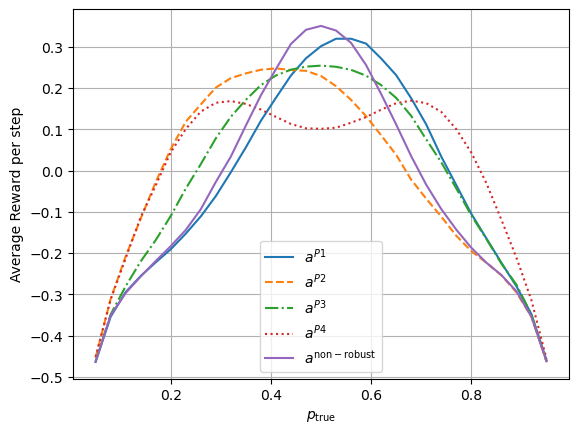

In [16]:
labels = ['$a^{P1}$', '$a^{P2}$', '$a^{P3}$', '$a^{P4}$', '$a^{\mathrm{non-robust}}$']
linetypes = ['-', '--', '-.', ':', '-']
for i in range(5):
    plt.plot(p_tilde,CR_avg[i],label = labels[i], linestyle=linetypes[i])
plt.xlabel('$p_{\mathrm{true}}$')
plt.ylabel('Average Reward per step')
plt.legend()
plt.grid()
plt.savefig('Figure_cointoss.png')


Convergence

Plot the difference

In [17]:
Nr_iter= 1000000
epsilon_greedy = lambda t: np.max([0.05, 1-2*t/Nr_iter])

In [18]:
Qstar_1,_ = finite_q_value_iteration(X, A, r, np.array([p1_0, p2_0]), alpha, Q_0=None, max_iter=1000, tolerance=1e-6)
_,_,q_unknown_1 = finite_q_learning(X, A, r, np.array([P1_0, P2_0]), alpha, x_0, k_0, epsilon_greedy, Nr_iter, gamma_t_tilde = lambda t: 1/(t+1)**(0.6), Q_0 = np.zeros([len(X),len(A)]), save_Qt=True)
_,_,q_known_1 = finite_q_learning_pknown(X, A, r, np.array([P1_0, P2_0]),np.array([p1_0, p2_0]), alpha, x_0, k_0, epsilon_greedy, Nr_iter, gamma_t_tilde = lambda t: 1/(t+1)**(0.6), Q_0 = np.zeros([len(X),len(A)]), save_Qt=True)

 24%|██▍       | 242/1000 [00:12<00:38, 19.63it/s]


✓ Converged after 243 iterations (max diff: 9.79e-07)


100%|██████████| 1000000/1000000 [04:27<00:00, 3735.09it/s]


In [19]:
Qstar_2,_ = finite_q_value_iteration(X, A, r, np.array([p1_0, p3_0]), alpha, Q_0=None, max_iter=1000, tolerance=1e-6)
_,_,q_unknown_2 = finite_q_learning(X, A, r, np.array([P1_0, P3_0]), alpha, x_0, k_0, epsilon_greedy, Nr_iter, gamma_t_tilde = lambda t: 1/(t+1)**(0.6), Q_0 = np.zeros([len(X),len(A)]), save_Qt=True)
_,_,q_known_2 = finite_q_learning_pknown(X, A, r, np.array([P1_0, P3_0]),np.array([p1_0, p3_0]), alpha, x_0, k_0, epsilon_greedy, Nr_iter, gamma_t_tilde = lambda t: 1/(t+1)**(0.6), Q_0 = np.zeros([len(X),len(A)]), save_Qt=True)

 24%|██▎       | 237/1000 [00:16<00:51, 14.75it/s]


✓ Converged after 238 iterations (max diff: 9.64e-07)


100%|██████████| 1000000/1000000 [04:15<00:00, 3913.71it/s]


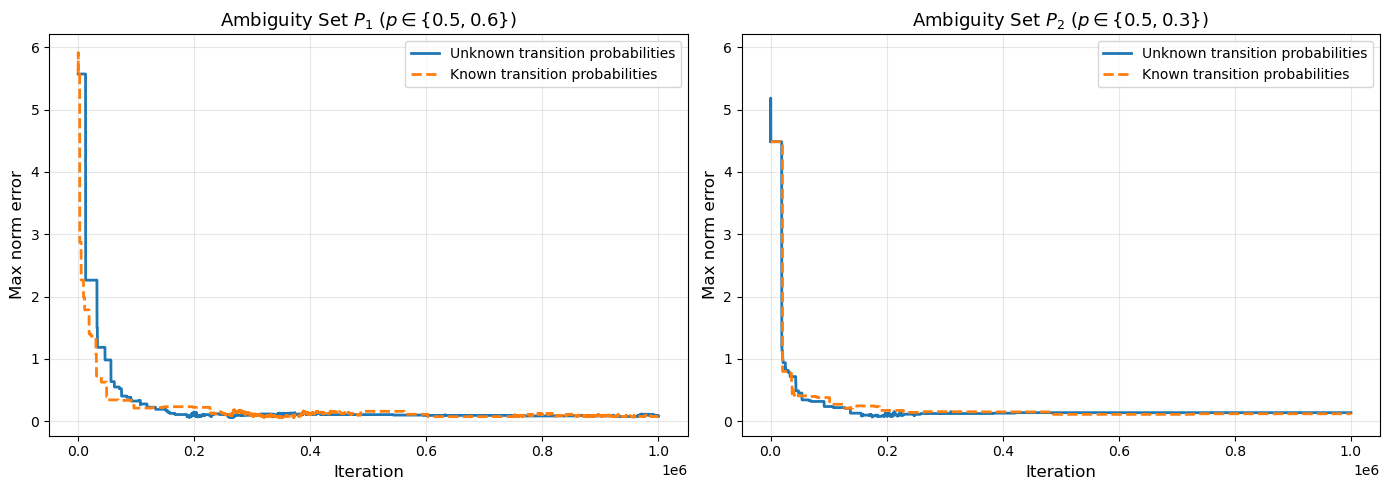

In [20]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Ambiguity set P1 (p=0.5 and p=0.6)
ax1.plot([np.max(np.abs(q_unknown_1[i] - Qstar_1)) for i in range(len(q_unknown_1))], 
         label='Unknown transition probabilities', linewidth=2)
ax1.plot([np.max(np.abs(q_known_1[i] - Qstar_1)) for i in range(len(q_known_1))], 
         label='Known transition probabilities', linewidth=2, linestyle='--')
ax1.set_xlabel('Iteration', fontsize=12)
ax1.set_ylabel('Max norm error', fontsize=12)
ax1.set_title('Ambiguity Set $P_1$ ($p \in \{0.5, 0.6\}$)', fontsize=13)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Subplot 2: Ambiguity set P2 (p=0.5 and p=0.3)
ax2.plot([np.max(np.abs(q_unknown_2[i] - Qstar_2)) for i in range(len(q_unknown_2))], 
         label='Unknown transition probabilities', linewidth=2)
ax2.plot([np.max(np.abs(q_known_2[i] - Qstar_2)) for i in range(len(q_known_2))], 
         label='Known transition probabilities', linewidth=2, linestyle='--')
ax2.set_xlabel('Iteration', fontsize=12)
ax2.set_ylabel('Max norm error', fontsize=12)
ax2.set_title('Ambiguity Set $P_2$ ($p \in \{0.5, 0.3\}$)', fontsize=13)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Fix y-axis scales to be the same for both subplots
y_max = max(ax1.get_ylim()[1], ax2.get_ylim()[1])
y_min = min(ax1.get_ylim()[0], ax2.get_ylim()[0])
ax1.set_ylim([y_min, y_max])
ax2.set_ylim([y_min, y_max])

plt.tight_layout()
plt.savefig('Figure_cointoss_convergence_both.png', dpi=300, bbox_inches='tight')
plt.show()